In [2]:
import numpy as np
import matplotlib.pyplot as plt

import darklim

import scipy.stats as stats

%matplotlib inline

Text(0.5, 0, 'Energy [eV]')

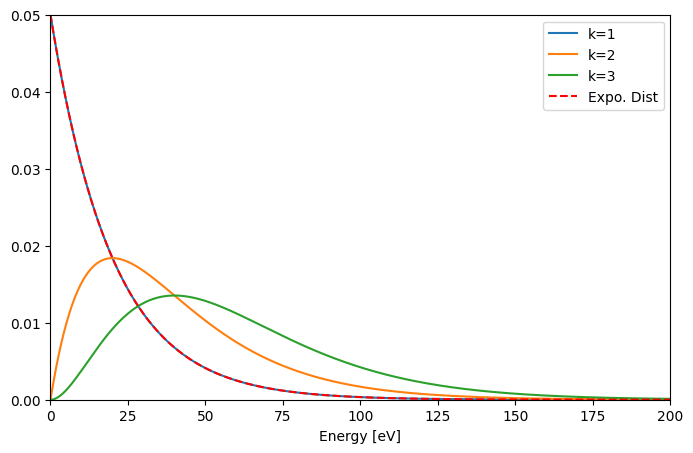

In [30]:
fig, ax = plt.subplots(1,figsize=(8,5))

lam = 1/20.
ks = np.arange(1,4)
x = np.linspace(0,200,2000)

for k in ks:

    dist = stats.erlang.pdf(x,a=k,loc=0,scale=1/lam)
    dist2 = stats.expon.pdf(x,loc=0,scale=1/lam)

    plt.plot(x, dist,label='k={:d}'.format(k))
    
plt.plot(x, dist2,'r--',label='Expo. Dist')
ax.set_xlim(0,200)
ax.set_ylim(0,0.05)
ax.legend(loc='upper right')
ax.set_xlabel('Energy [eV]')

[0. 0.]
[0. 0.]
[0. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 2.]
[0. 2.]
[0. 2.]
[0. 3.]
[0. 3.]
[1. 4.]
[1. 4.]
[2. 5.]
[2. 6.]
[3. 7.]


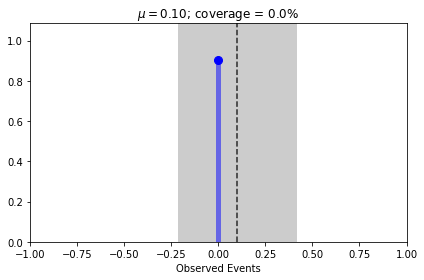

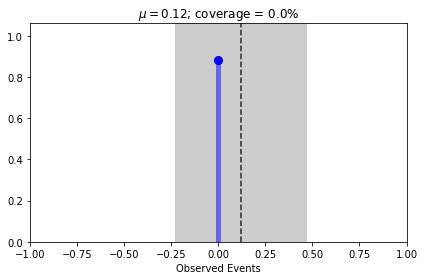

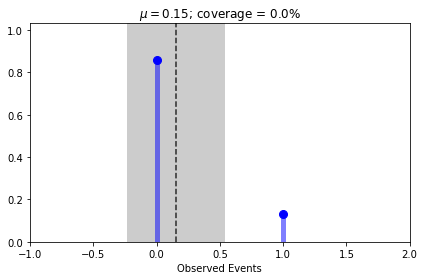

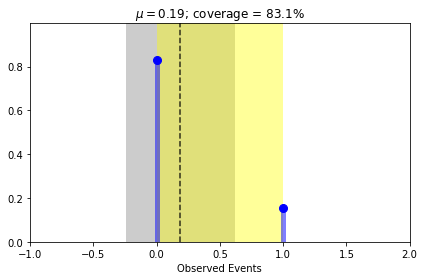

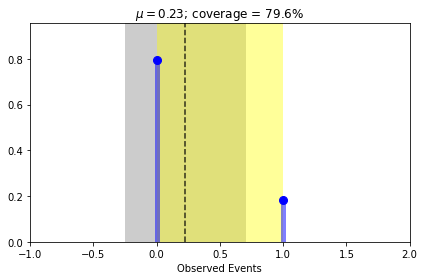

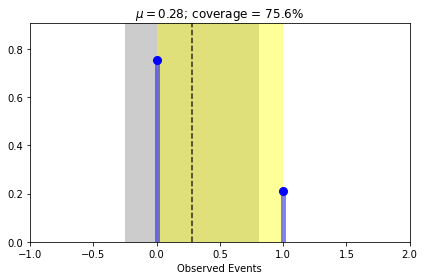

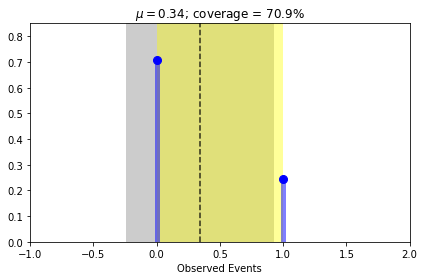

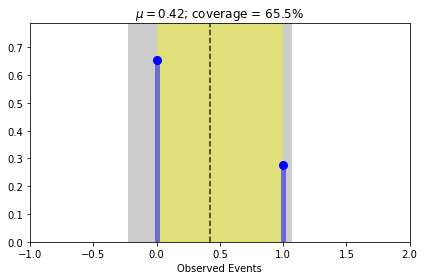

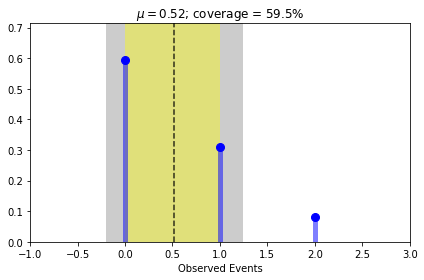

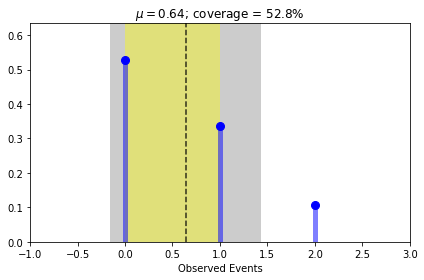

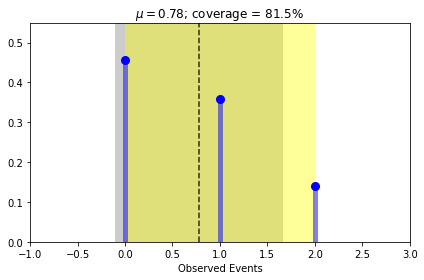

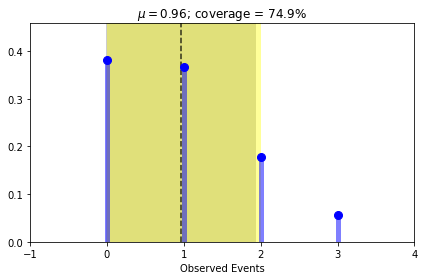

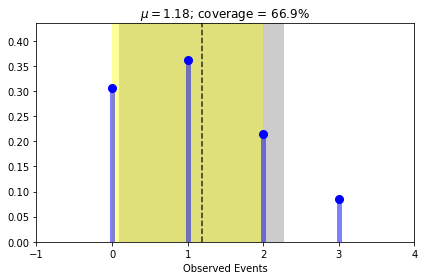

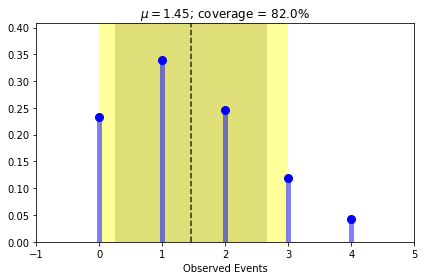

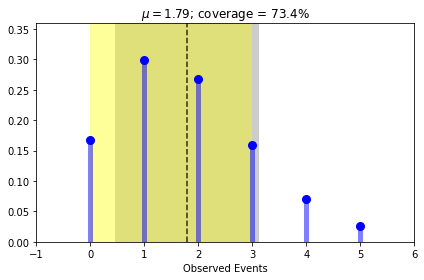

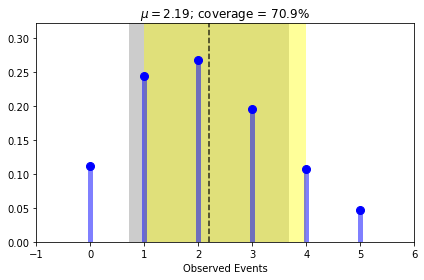

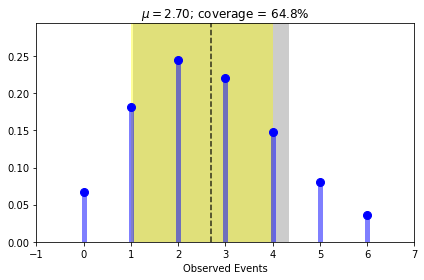

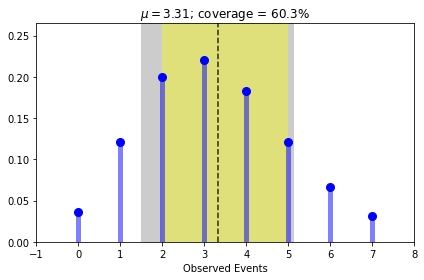

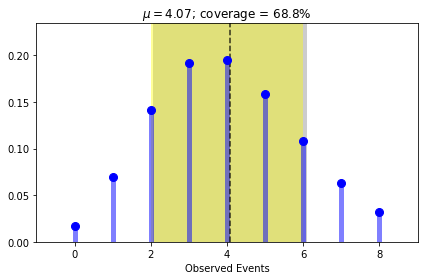

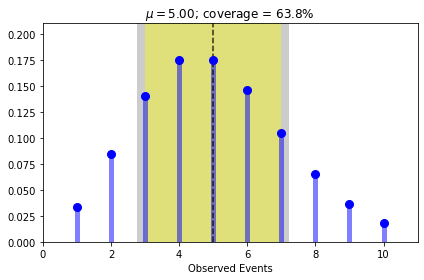

In [10]:
n_sig = 1

mus = np.geomspace(0.1,5,20)

for i,mu in enumerate(mus):
    
    fig = plt.figure()
    ax = fig.gca()
    sqrt_interval = np.array([mu-n_sig*np.sqrt(mu),mu+n_sig*np.sqrt(mu)])
    #interval = stats.poisson(mu).ppf(stats.norm.cdf([-1, 1]))

    dist = stats.poisson(mu)
    interval = np.stack([
        dist.ppf(stats.norm.cdf(-n_sig)),
        dist.ppf(stats.norm.cdf(+n_sig))])
    coverage = dist.cdf(interval[1] - 1) - dist.cdf(interval[0] - 1)
    print(interval)
    mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
    x = np.arange(poisson.ppf(0.01, mu),
                  poisson.ppf(0.99, mu))

    ax.axvline(mu, color='black', lw=1.5, linestyle='--', alpha=0.8)
    ax.axvspan(sqrt_interval[0], sqrt_interval[-1], alpha=0.4, facecolor='grey',label=r'$\sqrt{N}$')
    ax.axvspan(interval[0], interval[-1], alpha=0.4, facecolor='yellow',label='Central 68%')

    ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
    ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
    plt.xlim(x[0]-1,x[-1]+1)
    plt.ylim(0,np.max(poisson.pmf(x, mu))*1.2)
    plt.xlabel("Observed Events")
    
    plt.title(r'$\mu = ${:.2f}; coverage = {:.1f}%'.format(mu,coverage*100.))
    
    plt.tight_layout()
    #plt.savefig('./poisson_figs/image_{:d}.pdf'.format(i))